# <font color='#FFE15D'>**Week 5:  Model Selection ❌✔️❌**</font>

## **🔸 Imports**

In [242]:
import joblib
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, Ridge, ElasticNet, RidgeCV , ElasticNetCV , LassoCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, GridSearchCV, RandomizedSearchCV

from mlxtend.evaluate import bias_variance_decomp

## **🔸 Learning Curve (Scratch)**

### Functions

In [243]:
def polynomial(x):
    phi_x = np.array([x**i for i in range(d+1)])
    phi_x = phi_x[..., 0].T
    return phi_x

In [244]:
def linear_regression(x, w):
    y_hat = x @ w
    return y_hat

In [245]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [246]:
def gradient(x, y, y_hat):
    grads = 2*(x.T @ (y_hat - y)) / y.shape[0]
    return grads

In [247]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [248]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [249]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

### Load Dataset

In [250]:
notebook_path = os.getcwd()
# Datasets path
# auto
csv_train_path = f"{notebook_path}/data/energy-train-s.csv"
csv_test_path= f"{notebook_path}/data/energy-test-s.csv"

In [251]:
df = pd.read_csv(csv_train_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [252]:
d = 2
phi_x_train = polynomial(x_train)
phi_x_test = polynomial(x_test)

phi_x_train.shape, phi_x_test.shape

((29, 3), (50, 3))

### Initialization

In [253]:
w = np.random.randn(d+1, 1)
print(w)

eta = 0.01
n_epochs = 2000

[[-0.15087841]
 [ 1.45432926]
 [ 0.89037082]]


### Train

In [254]:
error_train_hist, error_test_hist = [], []
score_train_hist, score_test_hist = [], []

for epoch in range(n_epochs):
    # predictions
    y_hat = linear_regression(phi_x_train, w)
    
    # loss
    e = mse(y_train, y_hat)
    error_train_hist.append(e)  # loss train
    
    # gradients
    grads = gradient(phi_x_train, y_train, y_hat)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    # evaluation
    y_hat_test = linear_regression(phi_x_test, w)
    e = mse(y_hat_test, y_test)
    error_test_hist.append(e)  # loss test
    # metric test
    s = r2(y_test, y_hat_test)
    score_test_hist.append(s)
    # metric train
    s = r2(y_train, y_hat)
    score_train_hist.append(s)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={error_train_hist[epoch]:.4},\t Loss_test={error_test_hist[epoch]:.4}, \t Score_train={score_train_hist[epoch]:.4},\t Score_test={score_test_hist[epoch]:.4},\t w={w.T[0]}')

Epoch=99, 	 Loss_train=0.186,	 Loss_test=0.2504, 	 Score_train=0.814,	 Score_test=0.5915,	 w=[-0.61145497  0.57658058  0.69137886]
Epoch=199, 	 Loss_train=0.1529,	 Loss_test=0.2519, 	 Score_train=0.8471,	 Score_test=0.5889,	 w=[-0.71578409  0.46232924  0.74822965]
Epoch=299, 	 Loss_train=0.1498,	 Loss_test=0.2654, 	 Score_train=0.8502,	 Score_test=0.5669,	 w=[-0.75994887  0.44868875  0.77408114]
Epoch=399, 	 Loss_train=0.1493,	 Loss_test=0.2723, 	 Score_train=0.8507,	 Score_test=0.5557,	 w=[-0.77932922  0.44755371  0.78557219]
Epoch=499, 	 Loss_train=0.1492,	 Loss_test=0.2755, 	 Score_train=0.8508,	 Score_test=0.5505,	 w=[-0.78790948  0.4477027   0.79067895]
Epoch=599, 	 Loss_train=0.1491,	 Loss_test=0.277, 	 Score_train=0.8509,	 Score_test=0.5481,	 w=[-0.79171832  0.44785557  0.79294845]
Epoch=699, 	 Loss_train=0.1491,	 Loss_test=0.2776, 	 Score_train=0.8509,	 Score_test=0.547,	 w=[-0.79341044  0.44793499  0.79395703]
Epoch=799, 	 Loss_train=0.1491,	 Loss_test=0.2779, 	 Score_train=0.

#### Alternative

In [255]:
loss_train_hist, loss_test_hist = [], []
score_train_hist, score_test_hist = [], []

for epoch in range(n_epochs):
    # predictions
    y_hat = linear_regression(phi_x_train, w)
    
    # loss
    loss_train = mse(y_train, y_hat)
    loss_train_hist.append(loss_train)  # loss train
    
    # gradients
    grads = gradient(phi_x_train, y_train, y_hat)
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    # evaluation
    y_hat_test = linear_regression(phi_x_test, w)
    loss_test = mse(y_hat_test, y_test)
    loss_test_hist.append(loss_test)  # loss test
    # metric test
    score_test = r2(y_test, y_hat_test)
    score_test_hist.append(score_test)
    # metric train
    score_train = r2(y_train, y_hat)
    score_train_hist.append(score_train)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}, \t Score_train={score_train:.4},\t Score_test={score_test:.4},\t w={w.T[0]}')

Epoch=99, 	 Loss_train=0.1491,	 Loss_test=0.2781, 	 Score_train=0.8509,	 Score_test=0.5462,	 w=[-0.79476378  0.44800169  0.79476379]
Epoch=199, 	 Loss_train=0.1491,	 Loss_test=0.2781, 	 Score_train=0.8509,	 Score_test=0.5462,	 w=[-0.79476379  0.44800169  0.79476379]
Epoch=299, 	 Loss_train=0.1491,	 Loss_test=0.2781, 	 Score_train=0.8509,	 Score_test=0.5462,	 w=[-0.79476379  0.44800169  0.79476379]
Epoch=399, 	 Loss_train=0.1491,	 Loss_test=0.2781, 	 Score_train=0.8509,	 Score_test=0.5462,	 w=[-0.79476379  0.44800169  0.79476379]
Epoch=499, 	 Loss_train=0.1491,	 Loss_test=0.2781, 	 Score_train=0.8509,	 Score_test=0.5462,	 w=[-0.79476379  0.44800169  0.79476379]
Epoch=599, 	 Loss_train=0.1491,	 Loss_test=0.2781, 	 Score_train=0.8509,	 Score_test=0.5462,	 w=[-0.79476379  0.44800169  0.79476379]
Epoch=699, 	 Loss_train=0.1491,	 Loss_test=0.2781, 	 Score_train=0.8509,	 Score_test=0.5462,	 w=[-0.79476379  0.44800169  0.79476379]
Epoch=799, 	 Loss_train=0.1491,	 Loss_test=0.2781, 	 Score_trai

### Learning curve

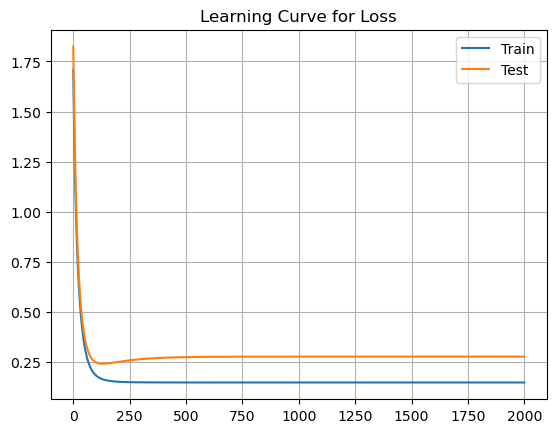

In [256]:
plt.plot(error_train_hist, label='Train')
plt.plot(error_test_hist, label='Test')
plt.legend()
plt.grid()
plt.title('Learning Curve for Loss');

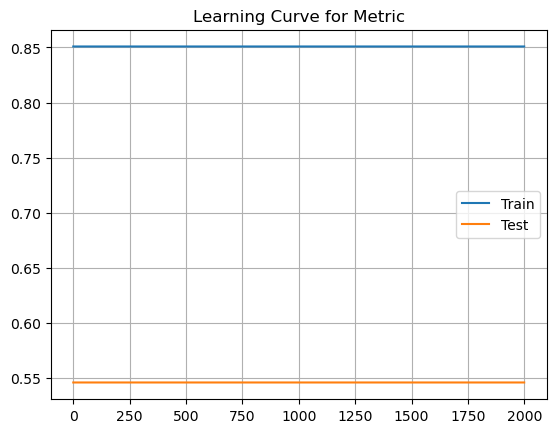

In [257]:
plt.plot(score_train_hist, label='Train')
plt.plot(score_test_hist, label='Test')
plt.legend()
plt.grid()
plt.title('Learning Curve for Metric');

## **🔸 Learning Curve (sklearn)**

In [258]:
df = pd.read_csv(csv_train_path)   
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [259]:
lr = 0.01
n_epochs = 3000

polynomial = PolynomialFeatures(degree=1)
model = SGDRegressor(eta0=lr)

# polynomial
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

loss_train_hist, loss_test_hist = [], []
for epoch in range(n_epochs):
    # fit
    model.partial_fit(x_train_poly, y_train.ravel())
    
    # prediction (train)
    y_hat = model.predict(x_train_poly)
    loss_train = mean_absolute_error(y_hat, y_train)
    loss_train_hist.append(loss_train)
    
    # prediction (test)
    y_hat = model.predict(x_test_poly)
    loss_test = mean_absolute_error(y_hat, y_test)
    loss_test_hist.append(loss_test)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}')
        
print(f'Model weights: {model.coef_}')

Epoch=99, 	 Loss_train=0.7692,	 Loss_test=0.5488
Epoch=199, 	 Loss_train=0.7688,	 Loss_test=0.5483
Epoch=299, 	 Loss_train=0.769,	 Loss_test=0.5486
Epoch=399, 	 Loss_train=0.7688,	 Loss_test=0.5483
Epoch=499, 	 Loss_train=0.7688,	 Loss_test=0.5483
Epoch=599, 	 Loss_train=0.7689,	 Loss_test=0.5485
Epoch=699, 	 Loss_train=0.769,	 Loss_test=0.5486
Epoch=799, 	 Loss_train=0.7689,	 Loss_test=0.5485
Epoch=899, 	 Loss_train=0.7688,	 Loss_test=0.5483
Epoch=999, 	 Loss_train=0.7689,	 Loss_test=0.5485
Epoch=1099, 	 Loss_train=0.7689,	 Loss_test=0.5485
Epoch=1199, 	 Loss_train=0.7689,	 Loss_test=0.5485
Epoch=1299, 	 Loss_train=0.7689,	 Loss_test=0.5485
Epoch=1399, 	 Loss_train=0.7689,	 Loss_test=0.5485
Epoch=1499, 	 Loss_train=0.7689,	 Loss_test=0.5484
Epoch=1599, 	 Loss_train=0.7689,	 Loss_test=0.5485
Epoch=1699, 	 Loss_train=0.7689,	 Loss_test=0.5484
Epoch=1799, 	 Loss_train=0.7689,	 Loss_test=0.5484
Epoch=1899, 	 Loss_train=0.769,	 Loss_test=0.5486
Epoch=1999, 	 Loss_train=0.7689,	 Loss_test=0

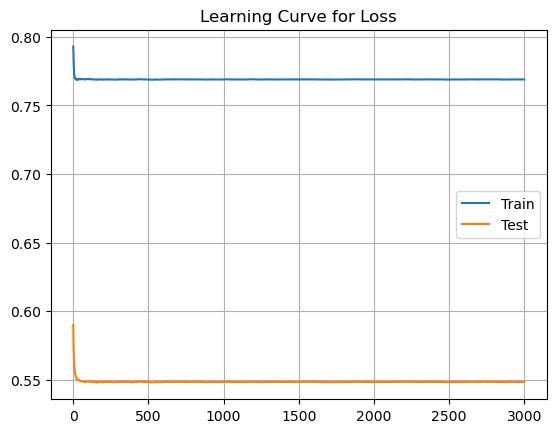

In [260]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')
plt.legend()
plt.grid()
plt.title('Learning Curve for Loss');

## **🔸 Underfit, Goodfit & Overfit**

<img src='imgs/learning-curve.png' width=800px />

In [261]:
df = pd.read_csv(csv_train_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [262]:
lr = 0.00001
n_epochs = 10000
d = 10

polynomial = PolynomialFeatures(degree=d)
model = SGDRegressor(eta0=lr)

# polynomial
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

loss_train_hist, loss_test_hist = [], []
for epoch in range(n_epochs):
    # fit
    model.partial_fit(x_train_poly, y_train.ravel())
    
    # prediction (train)
    y_hat = model.predict(x_train_poly)
    loss_train = mean_absolute_error(y_hat, y_train)
    loss_train_hist.append(loss_train)
    
    # prediction (test)
    y_hat = model.predict(x_test_poly)
    loss_test = mean_absolute_error(y_hat, y_test)
    loss_test_hist.append(loss_test)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}')
        
print(f'Model weights: {model.coef_}')

Epoch=99, 	 Loss_train=0.5619,	 Loss_test=0.697
Epoch=199, 	 Loss_train=0.5591,	 Loss_test=0.6774
Epoch=299, 	 Loss_train=0.5567,	 Loss_test=0.6645
Epoch=399, 	 Loss_train=0.5546,	 Loss_test=0.6505
Epoch=499, 	 Loss_train=0.5526,	 Loss_test=0.6367
Epoch=599, 	 Loss_train=0.5506,	 Loss_test=0.626
Epoch=699, 	 Loss_train=0.5487,	 Loss_test=0.6171
Epoch=799, 	 Loss_train=0.5469,	 Loss_test=0.6069
Epoch=899, 	 Loss_train=0.5453,	 Loss_test=0.5972
Epoch=999, 	 Loss_train=0.5435,	 Loss_test=0.5889
Epoch=1099, 	 Loss_train=0.542,	 Loss_test=0.5797
Epoch=1199, 	 Loss_train=0.5404,	 Loss_test=0.5724
Epoch=1299, 	 Loss_train=0.539,	 Loss_test=0.5632
Epoch=1399, 	 Loss_train=0.5375,	 Loss_test=0.5557
Epoch=1499, 	 Loss_train=0.536,	 Loss_test=0.5485
Epoch=1599, 	 Loss_train=0.5347,	 Loss_test=0.5415
Epoch=1699, 	 Loss_train=0.5333,	 Loss_test=0.534
Epoch=1799, 	 Loss_train=0.5319,	 Loss_test=0.5273
Epoch=1899, 	 Loss_train=0.5307,	 Loss_test=0.5206
Epoch=1999, 	 Loss_train=0.5294,	 Loss_test=0.51

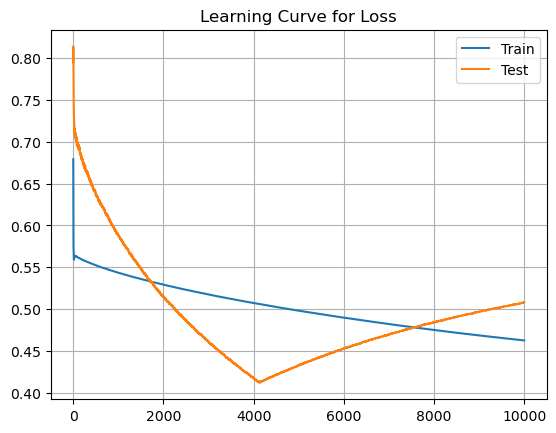

In [263]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')
plt.legend()
plt.grid()
plt.title('Learning Curve for Loss');
# plt.ylim([0.26, 0.41])

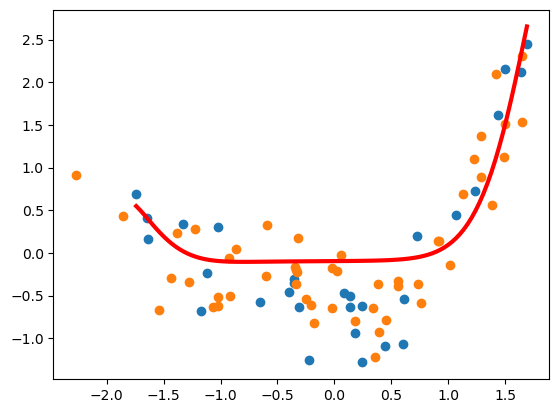

In [264]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = model.predict(xp)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)

In [265]:
a = np.array(loss_test_hist)
a.argmin(), a.min()

(4123, 0.4126051399115559)

## **🔸 Early Stopping**

### Scratch

In [266]:
df = pd.read_csv(csv_train_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [267]:
lr = 0.0005
n_epochs = 1000
d = 7

polynomial = PolynomialFeatures(degree=d)
model = SGDRegressor(eta0=lr, random_state=5)

# polynomial
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

loss_train_hist, loss_test_hist = [], []
best_loss = np.inf
n_es = 0
for epoch in range(n_epochs):
    # fit
    model.partial_fit(x_train_poly, y_train.ravel())
    
    # prediction (train)
    y_hat = model.predict(x_train_poly)
    loss_train = mean_absolute_error(y_hat, y_train)
    loss_train_hist.append(loss_train)
    
    # prediction (test)
    y_hat = model.predict(x_test_poly)
    loss_test = mean_absolute_error(y_hat, y_test)
    loss_test_hist.append(loss_test)
    
    # early stopping
    if loss_test < best_loss:
        best_loss = loss_test
        joblib.dump(model, 'best-model')
        best_epoch = epoch
        n_es = 0
    else:
        n_es += 1
        if n_es >= 5:
            break
        
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}')
        
print(f'Model weights: {model.coef_}')
print(f'Best epoch:{best_epoch}, Best loss:{best_loss}')

Model weights: [-0.02956197  0.00693103  0.00736618  0.01519292  0.02607011  0.0222926
  0.06311188  0.0215126 ]
Best epoch:22, Best loss:0.410070496658655


In [268]:
epoch, loss_test_hist[22:28]

(27,
 [0.410070496658655,
  0.4101589813391374,
  0.4102734660941871,
  0.4103811349991557,
  0.41048257879728145,
  0.41057831000944395])

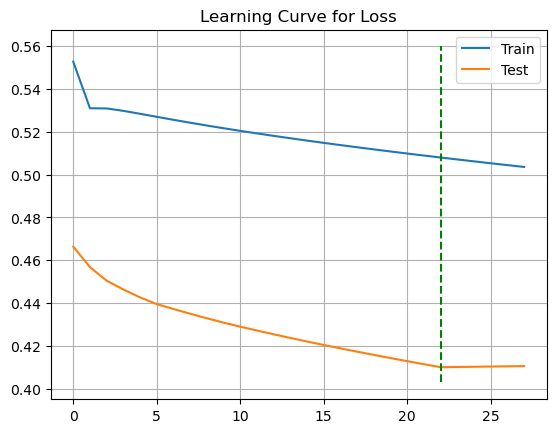

In [269]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')

ymin, ymax = plt.ylim()
plt.vlines(best_epoch, ymin, ymax, color='g', linestyles='--')
plt.title('Learning Curve for Loss');
plt.legend()
plt.grid()

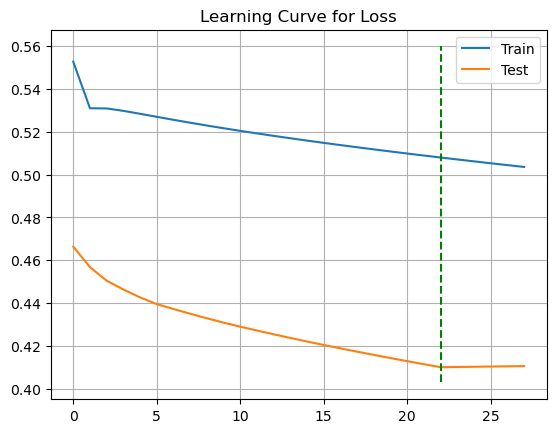

In [270]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')

ymin, ymax = plt.ylim()
plt.vlines(best_epoch, ymin, ymax, color='g', linestyles='--')
plt.title('Learning Curve for Loss');
plt.legend()
plt.grid()

Text(0.5, 1.0, 'Overfit')

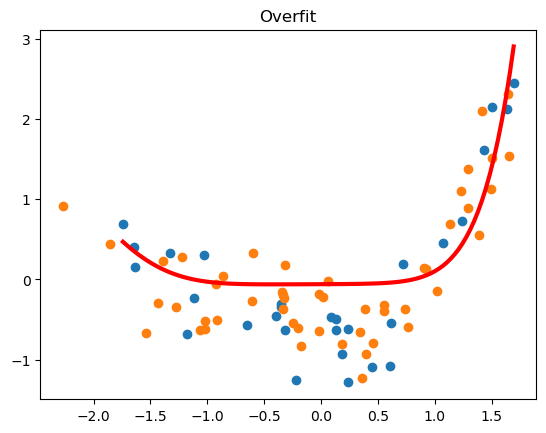

In [271]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = model.predict(xp)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)
plt.title('Overfit')

Text(0.5, 1.0, 'Overfit')

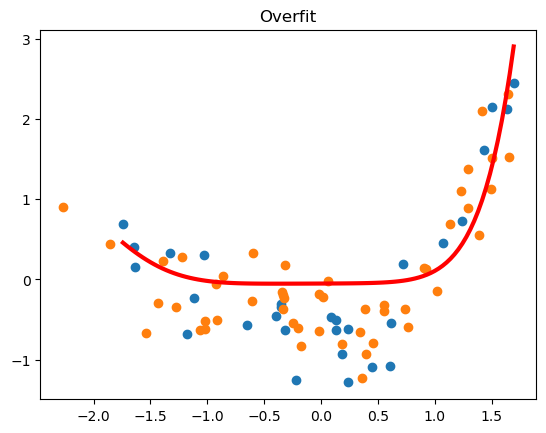

In [272]:
best_model = joblib.load('best-model')

x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = best_model.predict(xp)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)
plt.title('Overfit')

### Sklearn

In [273]:
lr = 0.0005
d = 7

polynomial = PolynomialFeatures(degree=d)
model = SGDRegressor(eta0=lr, verbose=1, max_iter=100, random_state=2, early_stopping=True, validation_fraction=0.2)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)
model.fit(x_train_poly, y_train.ravel())

-- Epoch 1
Norm: 0.05, NNZs: 8, Bias: 0.000201, T: 23, Avg. loss: 0.401082
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.06, NNZs: 8, Bias: -0.000427, T: 46, Avg. loss: 0.203482
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 8, Bias: -0.001381, T: 69, Avg. loss: 0.175771
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 8, Bias: -0.002292, T: 92, Avg. loss: 0.170660
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.07, NNZs: 8, Bias: -0.003210, T: 115, Avg. loss: 0.167257
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 8, Bias: -0.004098, T: 138, Avg. loss: 0.166553
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds


SGDRegressor(early_stopping=True, eta0=0.0005, max_iter=100, random_state=2,
             validation_fraction=0.2, verbose=1)

## **🔸 Regularization (Scratch)**

### Functions

In [274]:
def polynomial(x):
    phi_x = np.array([x**i for i in range(d+1)])
    phi_x = phi_x[..., 0].T
    return phi_x

In [275]:
def linear_regression(x, w):
    y_hat = x @ w
    return y_hat

In [276]:
def mse(y, y_hat):
    loss = np.mean((y - y_hat)**2)
    return loss

In [277]:
def regularization(w, mode='l2'):
    if mode == 'l2':
        norm = np.linalg.norm(w[1:], ord=2)**2
    if mode == 'l1':
        norm = np.linalg.norm(w[1:], ord=1)
    if mode == 'l1+l2':
        norm = r*np.linalg.norm(w[1:], ord=1) + 0.5 * (1-r) * np.linalg.norm(w[1:], ord=2)**2
    return norm

In [278]:
def gradient(x, y, y_hat, w, alpha, mode='l2'):
    grads = 2*(x.T @ (y_hat - y)) / y.shape[0] 
    if mode == 'l2':
        grads[1:] += 2*alpha*w[1:]
    if mode == 'l1':
        grads[1:] += alpha * np.sign(w[1:])
    if mode == 'l1+l2':
        grads[1:] += alpha * r * np.sign(w[1:]) + alpha * (r-1) * w[1:]
    return grads

In [279]:
def gradient_descent(w, eta, grads):
    w -= eta*grads
    return w

In [280]:
def mae(y, y_hat):
    loss = np.mean(np.abs(y - y_hat))
    return loss

In [281]:
def r2(y, y_hat):
    return 1 - np.sum((y - y_hat)**2) / np.sum((y - y.mean())**2)

### Load Dataset

In [282]:
df = pd.read_csv(csv_train_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [283]:
d = 7
phi_x_train = polynomial(x_train)
phi_x_test = polynomial(x_test)

phi_x_train.shape, phi_x_test.shape

((29, 8), (50, 8))

### Initialization

In [284]:
np.random.seed(15)
w = 0.1*np.random.randn(d+1, 1)
print(w)

eta = 0.0005
alpha = 2.0
n_epochs = 1500

[[-0.03123285]
 [ 0.03392847]
 [-0.01559085]
 [-0.05017897]
 [ 0.02355689]
 [-0.17636053]
 [-0.1095862 ]
 [-0.10877657]]


### Train

In [285]:
loss_train_hist, loss_test_hist = [], []
score_train_hist, score_test_hist = [], []
best_loss = np.inf

for epoch in range(n_epochs):
    # predictions
    y_hat = linear_regression(phi_x_train, w)
    
    # loss
    loss_train = mse(y_train, y_hat) + alpha*regularization(w, mode='l2')
    loss_train_hist.append(loss_train)  # loss train
    
    # gradients
    grads = gradient(phi_x_train, y_train, y_hat, w, alpha, mode='l2')
    
    # gradient descent
    w = gradient_descent(w, eta, grads)
    
    # evaluation
    y_hat_test = linear_regression(phi_x_test, w)
    loss_test = mse(y_hat_test, y_test)
    loss_test_hist.append(loss_test)  # loss test
    
    # early stopping
    if loss_test < best_loss:
        best_loss = loss_test
        w_best = w.copy()
        best_epoch = epoch
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}')

print(f'Model weights:\n {w_best.T[0]}')
print(f'Best epoch:{best_epoch}, Best loss:{best_loss}')

Epoch=99, 	 Loss_train=0.4113,	 Loss_test=0.8838
Epoch=199, 	 Loss_train=0.3716,	 Loss_test=0.4984
Epoch=299, 	 Loss_train=0.3435,	 Loss_test=0.3161
Epoch=399, 	 Loss_train=0.3229,	 Loss_test=0.2406
Epoch=499, 	 Loss_train=0.307,	 Loss_test=0.2195
Epoch=599, 	 Loss_train=0.2945,	 Loss_test=0.2245
Epoch=699, 	 Loss_train=0.2843,	 Loss_test=0.2407
Epoch=799, 	 Loss_train=0.2758,	 Loss_test=0.2603
Epoch=899, 	 Loss_train=0.2686,	 Loss_test=0.2797
Epoch=999, 	 Loss_train=0.2625,	 Loss_test=0.2973
Epoch=1099, 	 Loss_train=0.2572,	 Loss_test=0.3126
Epoch=1199, 	 Loss_train=0.2527,	 Loss_test=0.3255
Epoch=1299, 	 Loss_train=0.2488,	 Loss_test=0.3362
Epoch=1399, 	 Loss_train=0.2453,	 Loss_test=0.345
Epoch=1499, 	 Loss_train=0.2423,	 Loss_test=0.3524
Model weights:
 [-0.16698027  0.03306369  0.00904476  0.02875637  0.05666784  0.0048039
  0.05649606  0.02332994]
Best epoch:519, Best loss:0.21906693478303232


### Learning curve

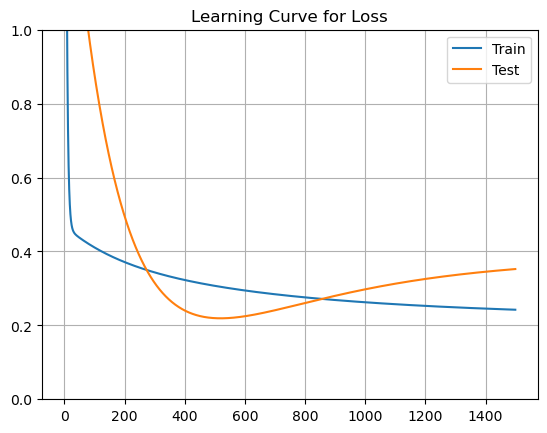

In [286]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')

plt.legend()
plt.grid()
plt.ylim([0, 1])
plt.title('Learning Curve for Loss');

### Visualization

Text(0.5, 1.0, 'Overfit')

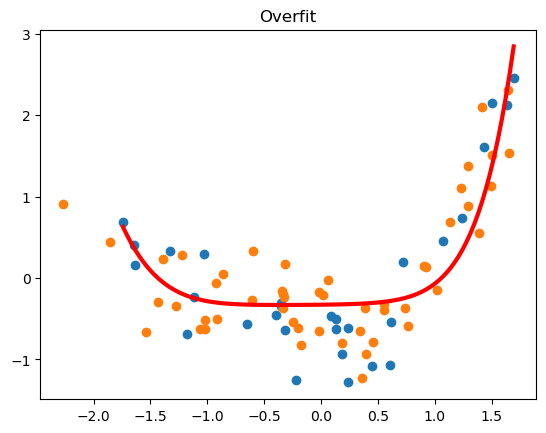

In [287]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial(x)
y_hat = linear_regression(xp, w)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)
plt.title('Overfit')

In [288]:
w

array([[-0.32798434],
       [ 0.01748172],
       [ 0.03092952],
       [ 0.03825937],
       [ 0.06000641],
       [ 0.04315677],
       [ 0.06032468],
       [ 0.00921707]])

Text(0.5, 1.0, 'Overfit')

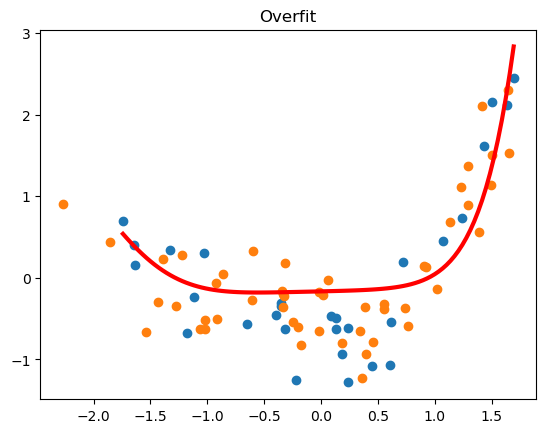

In [289]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial(x)
y_hat = linear_regression(xp, w_best)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)
plt.title('Overfit')

## **🔸 Regularization (sklearn)**

In [290]:
df = pd.read_csv(csv_train_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [291]:
lr = 0.0005
alpha = 1
n_epochs = 1200
r = 0.5
degree = 7

polynomial = PolynomialFeatures(degree=degree)
model = SGDRegressor(eta0=lr, penalty='elasticnet', alpha=alpha , l1_ratio=r , random_state=2)

# polynomial
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

loss_train_hist, loss_test_hist = [], []
for epoch in range(n_epochs):
    # fit
    model.partial_fit(x_train_poly, y_train.ravel())
    
    # prediction (train)
    y_hat = model.predict(x_train_poly)
    loss_train = mean_absolute_error(y_hat, y_train)
    loss_train_hist.append(loss_train)
    
    # prediction (test)
    y_hat = model.predict(x_test_poly)
    loss_test = mean_absolute_error(y_hat, y_test)
    loss_test_hist.append(loss_test)
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch={epoch}, \t Loss_train={loss_train:.4},\t Loss_test={loss_test:.4}')
        
print(f'Model weights: {model.coef_}')

Epoch=99, 	 Loss_train=0.5034,	 Loss_test=0.4143
Epoch=199, 	 Loss_train=0.4861,	 Loss_test=0.3958
Epoch=299, 	 Loss_train=0.4727,	 Loss_test=0.3844
Epoch=399, 	 Loss_train=0.4618,	 Loss_test=0.3805
Epoch=499, 	 Loss_train=0.4525,	 Loss_test=0.3785
Epoch=599, 	 Loss_train=0.4445,	 Loss_test=0.3778
Epoch=699, 	 Loss_train=0.4375,	 Loss_test=0.378
Epoch=799, 	 Loss_train=0.4313,	 Loss_test=0.3785
Epoch=899, 	 Loss_train=0.4258,	 Loss_test=0.379
Epoch=999, 	 Loss_train=0.4209,	 Loss_test=0.3799
Epoch=1099, 	 Loss_train=0.4165,	 Loss_test=0.3811
Epoch=1199, 	 Loss_train=0.4125,	 Loss_test=0.3822
Model weights: [0.         0.         0.         0.         0.         0.
 0.08164362 0.02913492]


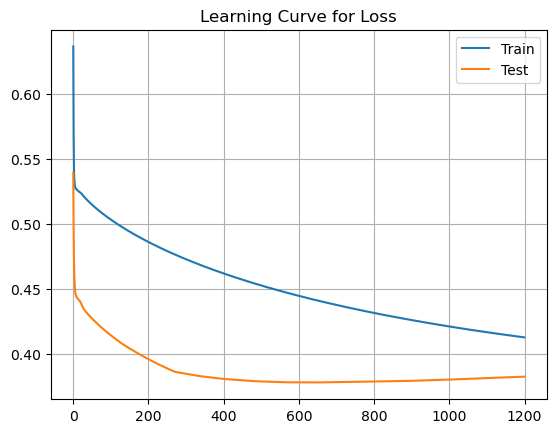

In [292]:
plt.plot(loss_train_hist, label='Train')
plt.plot(loss_test_hist, label='Test')

plt.legend()
plt.grid()
plt.title('Learning Curve for Loss');

## Close Form

In [293]:
alpha = 1
degree = 7
I = np.eye(8)
I[0,0] = 0
wc = np.linalg.inv(x_train_poly.T @ x_train_poly + alpha * I) @ x_train_poly.T @ y_train
wc

array([[-0.71101043],
       [-0.15484106],
       [ 0.38450589],
       [ 0.17380068],
       [ 0.31612394],
       [ 0.21825546],
       [-0.06532957],
       [-0.06646761]])

### Plot Close Form with Regu and Iterative with Regu

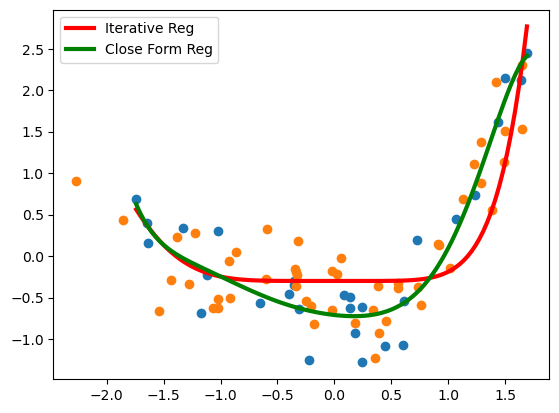

In [294]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat_iter = model.predict(xp)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat_iter, 'r', linewidth=3 , label='Iterative Reg')

y_hat_close = linear_regression(xp , wc)
plt.plot(x, y_hat_close, 'g', linewidth=3 , label='Close Form Reg')
plt.legend()

## **🔸 Ridge, LASSO, ElasticNet (sklearn)**

In [295]:
df = pd.read_csv(csv_train_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((29, 1), (29, 1), (50, 1), (50, 1))

In [296]:
lr = 0.01
alpha = 0.03
r = 0.5
degree = 8

polynomial = PolynomialFeatures(degree=degree)
model = ElasticNet(alpha, max_iter=5000)
#model = Lasso(alpha, max_iter=5000)

# polynomial
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

model.fit(x_train_poly, y_train.ravel())
model.score(x_test_poly, y_test)

0.7082373291730015

In [297]:
model.coef_

array([ 0.        , -0.        ,  0.30539014,  0.02066538,  0.28723128,
        0.21712491,  0.        , -0.05350284, -0.01592889])

Text(0.5, 1.0, 'Overfit')

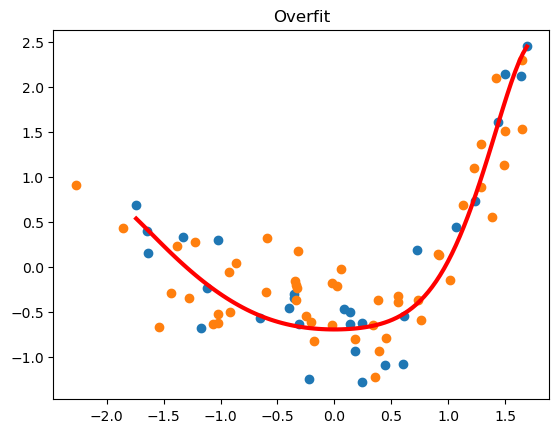

In [298]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = model.predict(xp)

plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test)
plt.plot(x, y_hat, 'r', linewidth=3)
plt.title('Overfit')

## **🔸 Bias-Variance (mlxtend)**

In [299]:
notebook_path = os.getcwd()
# Datasets path
# auto
csv_train_l_path = f"{notebook_path}/data/energy-train-l.csv"
csv_test_l_path= f"{notebook_path}/data/energy-test-l.csv"

In [300]:
df = pd.read_csv(csv_train_l_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_l_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

In [301]:
polynomial = PolynomialFeatures(degree=3)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.fit_transform(x_test)

In [302]:
model = LinearRegression()

In [303]:
mse, bias, var = bias_variance_decomp(model, x_train_poly, y_train.ravel(), x_test_poly, y_test.ravel(), loss='mse', num_rounds=100, random_seed=2)
print(mse, bias, var, bias+var)

0.30926573752996095 0.30829641053580525 0.000969326994155669 0.30926573752996095


#My test

In [304]:
min_bias_variance = 10000
best_bias = None
best_variance = None
best_degree = None
for test_no in range(1, 10):
    for degree in range(10):
        polynomial = PolynomialFeatures(degree=degree)

        x_train_poly = polynomial.fit_transform(x_train)
        x_test_poly = polynomial.fit_transform(x_test)

        model = LinearRegression()

        mse, bias, var = bias_variance_decomp(model, x_train_poly, y_train.ravel(), x_test_poly, y_test.ravel(), loss='mse', num_rounds=100, random_seed=2)
        # print(degree,mse, bias, var, bias+var)
        if mse < min_bias_variance:
                min_bias_variance = mse
                best_bias = bias
                best_variance = var
                best_degree = degree
                
    print(
            f"{test_no}- best_degree:{best_degree}, best_bias:{best_bias}, best_variance:{best_variance}, min_bias_variance:{min_bias_variance}"
        )            

1- best_degree:6, best_bias:0.30192649472464783, best_variance:0.0016550685317471435, min_bias_variance:0.30358156325639496
2- best_degree:6, best_bias:0.30192649472464783, best_variance:0.0016550685317471435, min_bias_variance:0.30358156325639496
3- best_degree:6, best_bias:0.30192649472464783, best_variance:0.0016550685317471435, min_bias_variance:0.30358156325639496
4- best_degree:6, best_bias:0.30192649472464783, best_variance:0.0016550685317471435, min_bias_variance:0.30358156325639496
5- best_degree:6, best_bias:0.30192649472464783, best_variance:0.0016550685317471435, min_bias_variance:0.30358156325639496
6- best_degree:6, best_bias:0.30192649472464783, best_variance:0.0016550685317471435, min_bias_variance:0.30358156325639496
7- best_degree:6, best_bias:0.30192649472464783, best_variance:0.0016550685317471435, min_bias_variance:0.30358156325639496
8- best_degree:6, best_bias:0.30192649472464783, best_variance:0.0016550685317471435, min_bias_variance:0.30358156325639496
9- best_

### Exercise: implement bias-variance from scratch

In [305]:
df = pd.read_csv(csv_train_l_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_l_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

In [306]:
# Exercise: implement bias-variance from scratch
min_bias_variance = 10000
best_bias=best_variance =best_degree= None
for test_no in range(1, 10):
    for degree in range(10):
        num_rounds = 100
        test_size_split_factor = 0.5
        all_preds = None
        for i in range(num_rounds):
            x_train_sub, _ , y_train_sub , _ = train_test_split(x_train, y_train, test_size=test_size_split_factor)
            if all_preds is None:
                all_preds = np.zeros((num_rounds, y_test.shape[0]))
            poly = PolynomialFeatures(degree=degree)
            x_train_poly = poly.fit_transform(x_train_sub)
            x_test_poly = poly.transform(x_test)
            model = LinearRegression()
            model.fit(x_train_poly, y_train_sub)
            preds = model.predict(x_test_poly)
            all_preds[i, :] = preds.ravel().copy()
        mean_preds = np.mean(all_preds, axis=0)        
        bias = np.mean((mean_preds - y_test.ravel()) ** 2)
        variance = np.mean((mean_preds - all_preds) ** 2)
        # print(degree,bias, variance , bias + variance)
        if bias + variance < min_bias_variance:
            min_bias_variance = bias + variance
            best_bias = bias
            best_variance = variance
            best_degree = degree
    print(f"{test_no}- best_degree:{best_degree}, best_bias:{best_bias}, best_variance:{best_variance}, min_bias_variance:{min_bias_variance}")

1- best_degree:6, best_bias:0.30223113038602456, best_variance:0.001788648395860628, min_bias_variance:0.3040197787818852
2- best_degree:6, best_bias:0.30154294695505796, best_variance:0.0019625918035282015, min_bias_variance:0.30350553875858616
3- best_degree:6, best_bias:0.30088668901864446, best_variance:0.0017321563319531988, min_bias_variance:0.30261884535059763
4- best_degree:6, best_bias:0.30088668901864446, best_variance:0.0017321563319531988, min_bias_variance:0.30261884535059763
5- best_degree:6, best_bias:0.30088668901864446, best_variance:0.0017321563319531988, min_bias_variance:0.30261884535059763
6- best_degree:6, best_bias:0.30088668901864446, best_variance:0.0017321563319531988, min_bias_variance:0.30261884535059763
7- best_degree:6, best_bias:0.30088668901864446, best_variance:0.0017321563319531988, min_bias_variance:0.30261884535059763
8- best_degree:6, best_bias:0.30088668901864446, best_variance:0.0017321563319531988, min_bias_variance:0.30261884535059763
9- best_de

## **🔸 Cross Validation**

In [307]:
df = pd.read_csv(csv_train_l_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_l_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

### Hold-out

In [308]:
x_train_s, x_valid, y_train_s, y_valid = train_test_split(x_train, y_train, test_size=0.2)
x_train_s.shape, x_valid.shape

((934, 1), (234, 1))

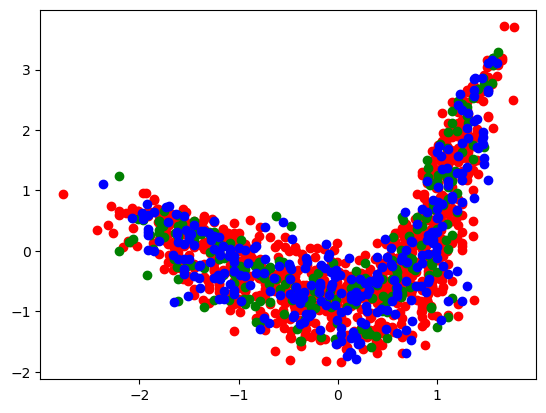

In [309]:
plt.scatter(x_train_s, y_train_s, c='r')
plt.scatter(x_valid, y_valid, c='g')
plt.scatter(x_test, y_test, c='b')

In [310]:
x_train_s, x_valid, y_train_s, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=5)

model = LinearRegression()
model.fit(x_train_s, y_train_s)
model.score(x_valid, y_valid)

0.13224874116364438

### K-fold

#### Simple example

In [311]:
X = np.array([[1, 2], 
              [3, 4], 
              [5, 6], 
              [7, 8]])

y = np.array([1, 2, 3, 4])

kf = KFold(2, shuffle=True, random_state=5)
list(kf.split(X))

for i, (train_idx, valid_idx) in enumerate(kf.split(X)):
    print(f'Fold {i}: \n Train:\n {X[train_idx], y[train_idx]}, \n Validation: \n{X[valid_idx], y[valid_idx]}\n')

Fold 0: 
 Train:
 (array([[5, 6],
       [7, 8]]), array([3, 4])), 
 Validation: 
(array([[1, 2],
       [3, 4]]), array([1, 2]))

Fold 1: 
 Train:
 (array([[1, 2],
       [3, 4]]), array([1, 2])), 
 Validation: 
(array([[5, 6],
       [7, 8]]), array([3, 4]))



#### Real Data

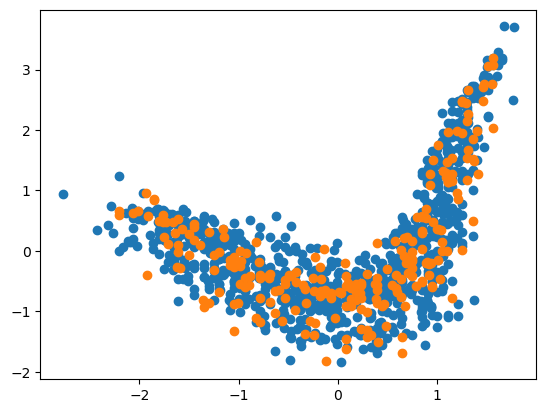

In [312]:
kf = KFold(5, shuffle=True, random_state=5)

list_kf = list(kf.split(x_train))
plt.scatter(x_train[list_kf[0][0]], y_train[list_kf[0][0]])
plt.scatter(x_train[list_kf[0][1]], y_train[list_kf[0][1]])

In [313]:
scores = []

for i, (train_idx, valid_idx) in enumerate(kf.split(x_train)):
    # train subset
    x_train_s, y_train_s = x_train[train_idx], y_train[train_idx]
    # validation
    x_valid, y_valid = x_train[valid_idx], y_train[valid_idx]
    
    model = LinearRegression()
    model.fit(x_train_s, y_train_s)
    
    scores.append(model.score(x_valid, y_valid))

scores = np.array(scores)
print(scores.mean(), scores.std())

0.10587827002821464 0.054651015714819014


### LOO

#### Simple example

In [363]:
X = np.array([[1, 2], 
              [3, 4], 
              [5, 6], 
              [7, 8]])

y = np.array([1, 2, 3, 4])

loo = LeaveOneOut()
list(loo.split(X))

for i, (train_idx, valid_idx) in enumerate(loo.split(X)):
    print(f'Fold {i}: \n Train:\n {X[train_idx], y[train_idx]}, \n Validation: \n{X[valid_idx], y[valid_idx]}\n')

Fold 0: 
 Train:
 (array([[3, 4],
       [5, 6],
       [7, 8]]), array([2, 3, 4])), 
 Validation: 
(array([[1, 2]]), array([1]))

Fold 1: 
 Train:
 (array([[1, 2],
       [5, 6],
       [7, 8]]), array([1, 3, 4])), 
 Validation: 
(array([[3, 4]]), array([2]))

Fold 2: 
 Train:
 (array([[1, 2],
       [3, 4],
       [7, 8]]), array([1, 2, 4])), 
 Validation: 
(array([[5, 6]]), array([3]))

Fold 3: 
 Train:
 (array([[1, 2],
       [3, 4],
       [5, 6]]), array([1, 2, 3])), 
 Validation: 
(array([[7, 8]]), array([4]))



#### Real Data

In [364]:
loo = LeaveOneOut()
degree = 3
polynomial = PolynomialFeatures(degree = degree)
MAEs = []

for i, (train_idx, valid_idx) in enumerate(loo.split(x_train)):
    # train subset
    x_train_s, y_train_s = x_train[train_idx], y_train[train_idx]
    # validation
    x_valid, y_valid = x_train[valid_idx], y_train[valid_idx]
    
    x_train_poly = polynomial.fit_transform(x_train_s)
    x_valid_poly = polynomial.fit_transform(x_valid)
    
    model = LinearRegression()
    model.fit(x_train_poly, y_train_s.ravel())
    y_hat_valid = model.predict(x_valid_poly)
    
    MAEs.append(mean_absolute_error(y_hat_valid, y_valid.ravel()))

MAEs = np.array(MAEs)
print(MAEs.mean(), MAEs.std())

0.40621077354231006 0.3498873153766427


### RidgeCV

In [316]:
df = pd.read_csv(csv_train_l_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_l_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

In [317]:
polynomial = PolynomialFeatures(degree=4)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.fit_transform(x_test)

In [318]:
model = RidgeCV(alphas=(100., 10., 1.0, 0.1, 0.01, 0.001), scoring='r2', cv=10)
model.fit(x_train_poly, y_train)

RidgeCV(alphas=(100.0, 10.0, 1.0, 0.1, 0.01, 0.001), cv=10, scoring='r2')

In [319]:
model.alpha_

10.0

In [320]:
model = Ridge(alpha=10.)
model.fit(x_train_poly, y_train)
model.score(x_test_poly, y_test)

0.7042104695234381

## ElasticNetCV

In [321]:
df = pd.read_csv(csv_train_l_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_l_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

In [322]:
polynomial = PolynomialFeatures(degree=4)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.fit_transform(x_test)

In [323]:
model = ElasticNetCV(l1_ratio=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9))
model.fit(x_train_poly, y_train.ravel())

ElasticNetCV(l1_ratio=(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9))

In [324]:
alpha = model.alpha_ 
l1_ratio = model.l1_ratio_
alpha , l1_ratio

(0.005994002142838706, 0.9)

In [325]:
model = ElasticNet(alpha=alpha , l1_ratio=l1_ratio)
model.fit(x_train_poly, y_train)
model.score(x_test_poly, y_test)

0.7041534929567033

## LassoCV

In [326]:
df = pd.read_csv(csv_train_l_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_l_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

In [327]:
polynomial = PolynomialFeatures(degree=4)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.fit_transform(x_test)

In [328]:
model = LassoCV()
model.fit(x_train_poly, y_train.ravel())

LassoCV()

In [329]:
alpha = model.alpha_ 
alpha 

0.006202481304742036

In [330]:
model = Lasso(alpha=alpha)
model.fit(x_train_poly, y_train)
model.score(x_test_poly, y_test)

0.7042318884315488

### store_cv_values

In [331]:
model = RidgeCV(alphas=(100., 10., 1.0, 0.1, 0.01, 0.001), scoring='r2', store_cv_values=True)
model.fit(x_train, y_train)

e:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(


RidgeCV(alphas=(100.0, 10.0, 1.0, 0.1, 0.01, 0.001), scoring='r2',
        store_cv_values=True)

In [332]:
model.cv_values_.shape, model.cv_values_[:, 0, 0]

e:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


((1168, 1, 6),
 array([0.14998307, 0.26381088, 0.20251546, ..., 0.1402462 , 0.17264265,
        0.0260637 ]))

## **🔸 Hyperparameter Tuning**

In [333]:
df = pd.read_csv(csv_train_l_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_l_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

### Grid Search

In [334]:
polynomial = PolynomialFeatures(degree=3)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.fit_transform(x_test)

In [335]:
model = SGDRegressor(random_state=2)

In [336]:
lrs = np.logspace(-3, 0, 10)
alphas = np.logspace(-6, 0, 10)

param_grid = {'eta0': lrs, 'alpha': alphas}
search = GridSearchCV(model, param_grid, verbose=0, return_train_score=True)

search.fit(x_train_poly, y_train.ravel())

GridSearchCV(estimator=SGDRegressor(random_state=2),
             param_grid={'alpha': array([1.00000000e-06, 4.64158883e-06, 2.15443469e-05, 1.00000000e-04,
       4.64158883e-04, 2.15443469e-03, 1.00000000e-02, 4.64158883e-02,
       2.15443469e-01, 1.00000000e+00]),
                         'eta0': array([0.001     , 0.00215443, 0.00464159, 0.01      , 0.02154435,
       0.04641589, 0.1       , 0.21544347, 0.46415888, 1.        ])},
             return_train_score=True)

In [337]:
search.best_estimator_.score(x_test_poly, y_test)

0.6985168737495981

In [338]:
search.best_index_, search.best_params_, search.best_score_

(2, {'alpha': 1e-06, 'eta0': 0.004641588833612777}, 0.7085245157472255)

In [339]:
df_cv = pd.DataFrame(search.cv_results_)
df_cv = df_cv.sort_values(by='rank_test_score')
df_cv[['params', 'rank_test_score', 'mean_train_score', 'mean_test_score']]

,params,rank_test_score,mean_train_score,mean_test_score
2,"{'alpha': 1e-06, 'eta0': 0.004641588833612777}",1,7.122789e-01,7.085245e-01
12,"{'alpha': 4.641588833612782e-06, 'eta0': 0.004...",2,7.122786e-01,7.085242e-01
22,"{'alpha': 2.1544346900318823e-05, 'eta0': 0.00...",3,7.122772e-01,7.085229e-01
32,"{'alpha': 0.0001, 'eta0': 0.004641588833612777}",4,7.122708e-01,7.085166e-01
42,"{'alpha': 0.00046415888336127773, 'eta0': 0.00...",5,7.122407e-01,7.084873e-01
...,...,...,...,...
19,"{'alpha': 4.641588833612782e-06, 'eta0': 1.0}",96,-5.781310e+21,-6.073673e+21
9,"{'alpha': 1e-06, 'eta0': 1.0}",97,-2.725867e+22,-2.749525e+22
39,"{'alpha': 0.0001, 'eta0': 1.0}",98,-4.469671e+22,-4.356081e+22
69,"{'alpha': 0.01, 'eta0': 1.0}",99,-7.631622e+22,-4.896849e+22


### Random Search

In [340]:
polynomial = PolynomialFeatures(degree=3)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.fit_transform(x_test)

In [341]:
model = SGDRegressor(random_state=2)

In [342]:
lrs = np.logspace(-3, 0, 100)
alphas = np.logspace(-6, 0, 100)

param_distr = {'eta0': lrs, 'alpha': alphas}
search = RandomizedSearchCV(model, param_distr, verbose=1, n_iter=100, random_state=35)

search.fit(x_train_poly, y_train.ravel())

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=SGDRegressor(random_state=2), n_iter=100,
                   param_distributions={'alpha': array([1.00000000e-06, 1.14975700e-06, 1.32194115e-06, 1.51991108e-06,
       1.74752840e-06, 2.00923300e-06, 2.31012970e-06, 2.65608778e-06,
       3.05385551e-06, 3.51119173e-06, 4.03701726e-06, 4.64158883e-06,
       5.33669923e-06, 6.13590727e-06, 7.05480231e-06, 8.11130831e-06,
       9.326...
       0.09326033, 0.1       , 0.10722672, 0.1149757 , 0.12328467,
       0.13219411, 0.14174742, 0.15199111, 0.16297508, 0.17475284,
       0.18738174, 0.2009233 , 0.21544347, 0.23101297, 0.24770764,
       0.26560878, 0.28480359, 0.30538555, 0.32745492, 0.35111917,
       0.37649358, 0.40370173, 0.43287613, 0.46415888, 0.49770236,
       0.53366992, 0.57223677, 0.61359073, 0.65793322, 0.70548023,
       0.75646333, 0.81113083, 0.869749  , 0.93260335, 1.        ])},
                   random_state=35, verbose=1)

In [343]:
search.best_estimator_

SGDRegressor(alpha=1.873817422860383e-05, eta0=0.01519911082952934,
             random_state=2)

In [344]:
search.best_score_

0.710035329849091

In [345]:
search.best_estimator_.score(x_test_poly, y_test)

0.6998604359725551

### Proposed method!

In [346]:
polynomial = PolynomialFeatures(degree=3)

x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.fit_transform(x_test)

In [347]:
model = SGDRegressor(random_state=2)

In [348]:
lrs = np.logspace(-3, 0, 500)
alphas = np.logspace(-6, 0, 500)

param_distr = {'eta0': lrs, 'alpha': alphas}
search = RandomizedSearchCV(model, param_distr, verbose=1, n_iter=500, random_state=35)

search.fit(x_train_poly, y_train.ravel())
search.best_score_

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


0.710184039807275

In [349]:
lr, alpha = search.best_params_.values()
lr, alpha

(0.01407008085602685, 0.0011971713434189668)

In [350]:
lrs = np.linspace(lr-0.01, lr+0.02, 50)
alpha = np.linspace(alpha-0.01, alpha+0.01, 50)

param_grid = {'eta0': lrs, 'alpha': alpha}
search = GridSearchCV(model, param_grid)
search.fit(x_train_poly, y_train.ravel())

search.best_score_, search.best_params_

e:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5500 fits failed out of a total of 12500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "e:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "e:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "e:\ProgramData\anaconda3\Lib\site-pac

(0.7101699886809693,
 {'alpha': 0.000176763180153661, 'eta0': 0.014478244121332973})

## **🔸 Final**

<img src='imgs/final.png' width=800px />

### Load Train/Test 

In [351]:
df = pd.read_csv(csv_train_l_path)
train_set = np.array(df)

x_train = train_set[:, :-1]
y_train = train_set[:, -1:]

df = pd.read_csv(csv_test_l_path)
test_set = np.array(df)

x_test = test_set[:, :-1]
y_test = test_set[:, -1:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1168, 1), (1168, 1), (292, 1), (292, 1))

### Define Model

In [352]:
degree = 4
polynomial = PolynomialFeatures(degree=degree)
model = SGDRegressor(random_state=31)

In [353]:
x_train_poly = polynomial.fit_transform(x_train)
x_test_poly = polynomial.transform(x_test)

### Hyper-parameter Tuning

#### Hyper-parameters

In [354]:
lrs = np.logspace(-3, 0, 50)
alphas = np.logspace(-6, 0, 50)
param_distr = {'eta0': lrs, 'alpha': alphas}

In [355]:
lrs, alphas

(array([0.001     , 0.0011514 , 0.00132571, 0.00152642, 0.00175751,
        0.00202359, 0.00232995, 0.0026827 , 0.00308884, 0.00355648,
        0.00409492, 0.00471487, 0.00542868, 0.00625055, 0.00719686,
        0.00828643, 0.00954095, 0.01098541, 0.01264855, 0.01456348,
        0.01676833, 0.01930698, 0.02222996, 0.02559548, 0.02947052,
        0.03393222, 0.0390694 , 0.04498433, 0.05179475, 0.05963623,
        0.06866488, 0.07906043, 0.09102982, 0.10481131, 0.12067926,
        0.13894955, 0.15998587, 0.184207  , 0.21209509, 0.24420531,
        0.28117687, 0.32374575, 0.37275937, 0.42919343, 0.49417134,
        0.5689866 , 0.65512856, 0.75431201, 0.86851137, 1.        ]),
 array([1.00000000e-06, 1.32571137e-06, 1.75751062e-06, 2.32995181e-06,
        3.08884360e-06, 4.09491506e-06, 5.42867544e-06, 7.19685673e-06,
        9.54095476e-06, 1.26485522e-05, 1.67683294e-05, 2.22299648e-05,
        2.94705170e-05, 3.90693994e-05, 5.17947468e-05, 6.86648845e-05,
        9.10298178e-05, 1.2067

#### Coarse grid

In [356]:
random_search = RandomizedSearchCV(model, param_distr, n_iter=250, random_state=31)
random_search.fit(x_train_poly, y_train.ravel())

random_search.best_params_, random_search.best_score_

({'eta0': 0.008286427728546842, 'alpha': 1.325711365590108e-06},
 0.709712668413154)

#### Fine grid

In [357]:
lr, alpha = random_search.best_params_.values()

d1, d2 = 0.1, 0.1
lrs = np.r_[np.linspace((1-d1)*lr, (1+d1)*lr, 50), lr]
alphas = np.r_[np.linspace((1+d2)*alpha, (1+d2)*alpha, 50), alpha]

param_grid = {'eta0': lrs, 'alpha': alphas}

In [358]:
grid_search = GridSearchCV(model, param_grid)
grid_search.fit(x_train_poly, y_train.ravel())

grid_search.best_params_, grid_search.best_score_

({'alpha': 1.325711365590108e-06, 'eta0': 0.009115070501401527},
 0.7108457954153533)

### Retrain Model

In [359]:
model = grid_search.best_estimator_

#### Visualize

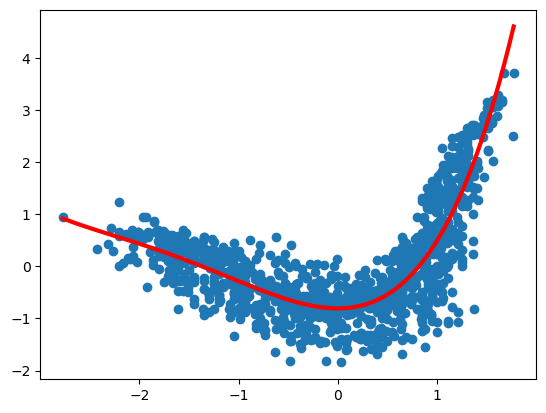

In [360]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = model.predict(xp)

plt.scatter(x_train, y_train)
plt.plot(x, y_hat, 'r', linewidth=3)

### Final Evaluation

In [361]:
model.score(x_test_poly, y_test)

0.6999975635651177

#### Visualize

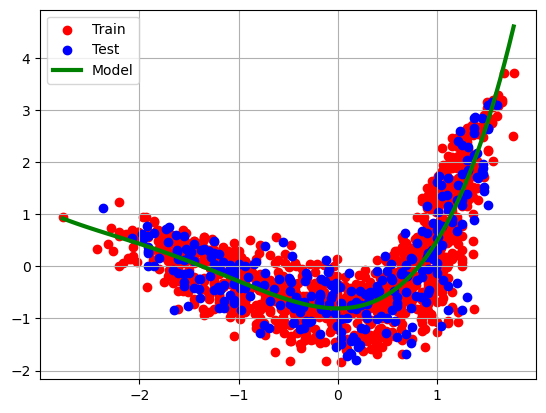

In [362]:
x = np.linspace(x_train.min(), x_train.max(), 100)[:, None]
xp = polynomial.transform(x)
y_hat = model.predict(xp)

plt.scatter(x_train, y_train, c='r')
plt.scatter(x_test, y_test, c='b')
plt.plot(x, y_hat, 'g', linewidth=3)

plt.grid()
plt.legend(['Train', 'Test', 'Model'])